In [5]:
import numpy as np
from PIL import Image
from collections import Counter
import matplotlib.pyplot as plt

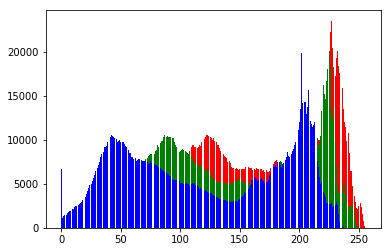

In [11]:
img = Image.open("static/img/cing.jpg")
img_arr = np.asarray(img)
r = img_arr[:, :, 0].flatten()
g = img_arr[:, :, 1].flatten()
b = img_arr[:, :, 2].flatten()
data_r = Counter(r)
data_g = Counter(g)
data_b = Counter(b)
data_rgb = [data_r, data_g, data_b]
warna = ['red','green','blue']
data_hist = list(zip(warna,data_rgb))
# for data in data_rgb:
#     plt.bar(list(data.keys()), data.values(), color='b')
#     plt.savefig('red_histogram.jpg', dpi=300)
for data in data_hist:
    plt.bar(list(data[1].keys()), data[1].values(), color=f'{data[0]}')
    plt.savefig(f'static/img/{data[0]}_histogram.jpg', dpi=300)
plt.savefig(f'static/img/rgb_histogram.jpg', dpi=300)

In [ ]:
img = Image.open("static/img/cing.png")

In [ ]:
img

In [ ]:
img_arr = np.asarray(img)

In [ ]:
img_arr

In [ ]:
r = img_arr[:, :, 0].flatten()
g = img_arr[:, :, 1].flatten()
b = img_arr[:, :, 2].flatten()
r

In [ ]:
# r = r.flatten()
# g = g.flatten()
# b = b.flatten()
len(r)

In [ ]:
from collections import Counter
data_r = Counter(r)
data_g = Counter(g)
data_b = Counter(b)
data_rgb = [data_r, data_g, data_b]
color = ['red', 'green', 'blue']
data_d = [[1,2,3],[4,5,6],[7,8,9]]
data_hist = list(zip(color,data_rgb))

In [ ]:
for data in data_hist:
    print(data[1])

In [ ]:
# data_hist[0][0]
data_hist[0]

In [ ]:
# for data in data_hist:
#     print(data)
# print(data_hist[0])
for i in range(2):
    for j in range(2):
        print(data_hist[i][j])

In [ ]:
for data in data_d:
    for c in color:
        print(data,c)

In [ ]:
for c in color:
    for data in data_d:
        print(data,c)

In [ ]:
z = zip(color,data_d)
for each in z:
    print(each)

In [ ]:
data_rgb

In [ ]:
# for data,idx in data_rgb:
#     print(idx)
enumerate(data_rgb)

In [ ]:
import matplotlib.pyplot as plt
from pylab import savefig
plt.bar(list(data_r.keys()), data_r.values(), color='b')
plt.savefig('red_histogram.jpg', dpi=300)
plt.show()